In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [3]:
from pymc3_models.models.LinearRegression import LinearRegression

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

Generate Synthetic Data
===

In [5]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [6]:
Y = np.squeeze(Y)

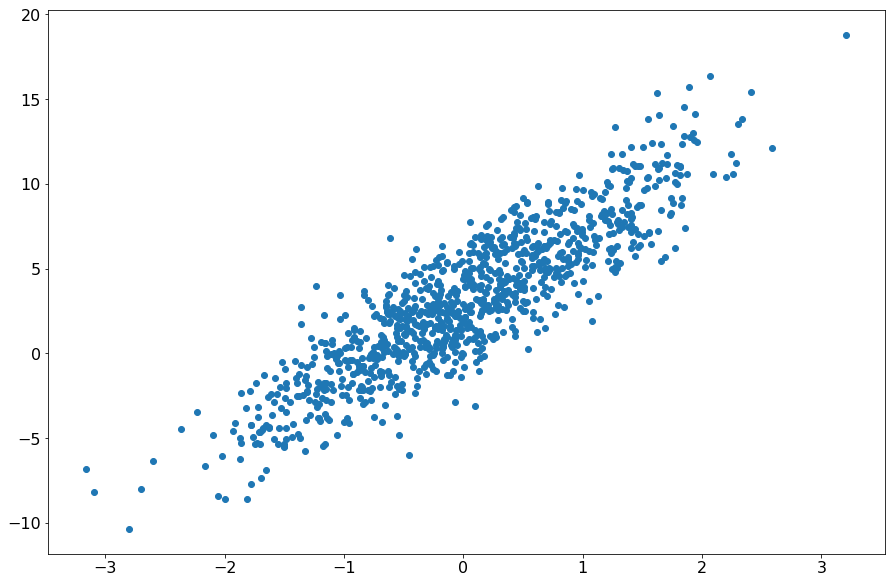

In [7]:
plt.scatter(X, Y)

Fit w/ ADVI
===

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(X, Y, minibatch_size=100)

Average Loss = 226.43:  13%|█▎        | 26371/200000 [00:23<02:35, 1116.13it/s]
Convergence archived at 26500
Interrupted at 26,499 [13%]: Average Loss = 567.28


LinearRegression()

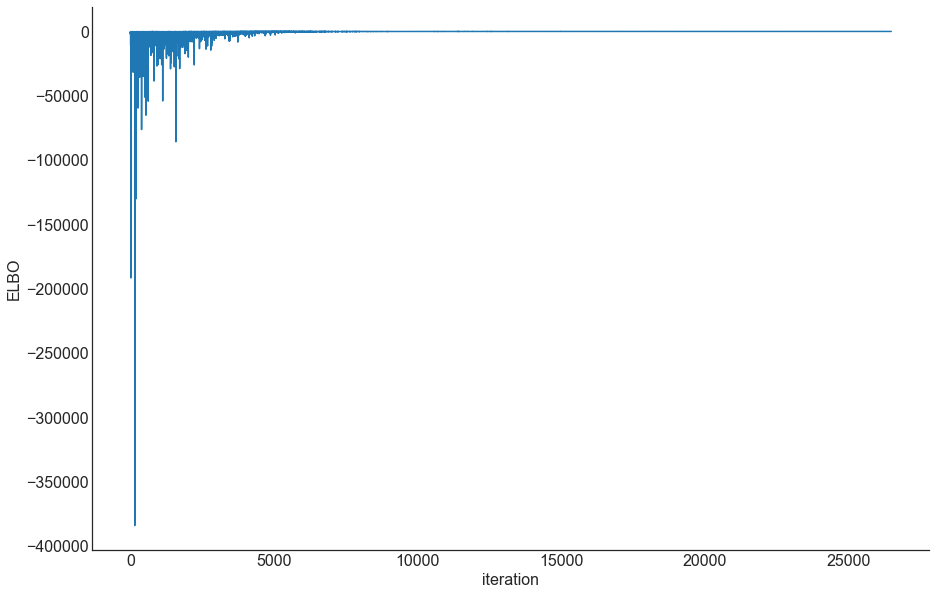

In [10]:
LR.plot_elbo()

In [11]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:01<00:00, 1286.00it/s]


In [12]:
LR.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1510.83it/s]


0.79082211840872196

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f766a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119d61978>]], dtype=object)

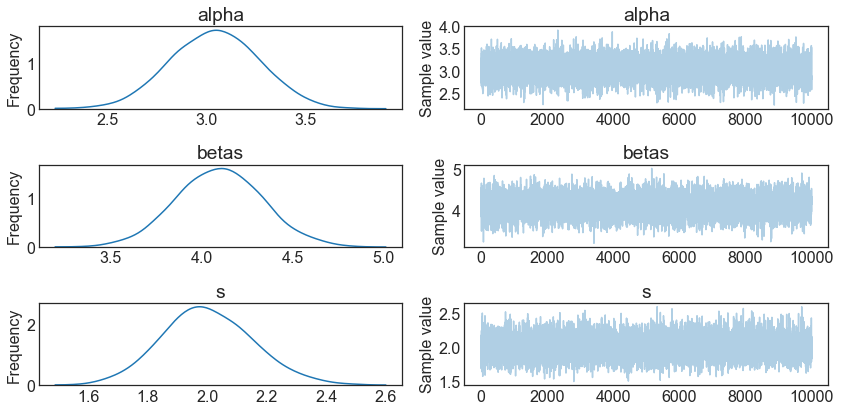

In [13]:
traceplot(LR.trace)

In [14]:
LR.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,3.043639,0.222944,0.001987,2.613332,3.475031
betas__0_0,4.098008,0.236965,0.002108,3.621550,4.561478
s,2.002271,0.153854,0.001592,1.707456,2.314882


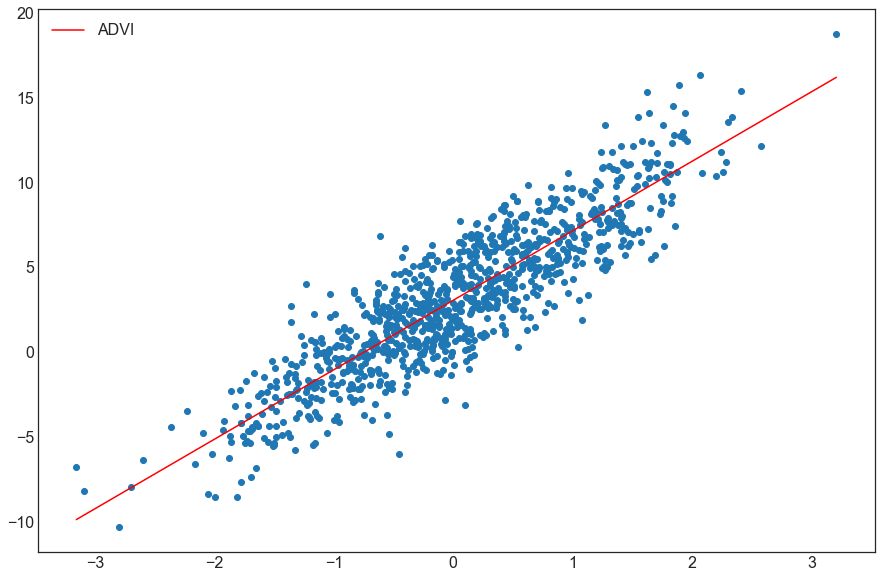

In [16]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']
fig1 = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.legend()

In [17]:
LR.save('pickle_jar/LR_jar/')

In [18]:
LR4 = LinearRegression()

In [19]:
LR4.load('pickle_jar/LR_jar/')

In [20]:
LR4.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1305.02it/s]


0.79057091131702029

Fit w/ NUTS
===

In [21]:
LR2 = LinearRegression()

In [22]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s_log__, betas, alpha]
100%|██████████| 2500/2500 [00:04<00:00, 594.51it/s]


LinearRegression()

In [23]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1443.78it/s]


0.7907149729749714

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a27b828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119ab5e80>]], dtype=object)

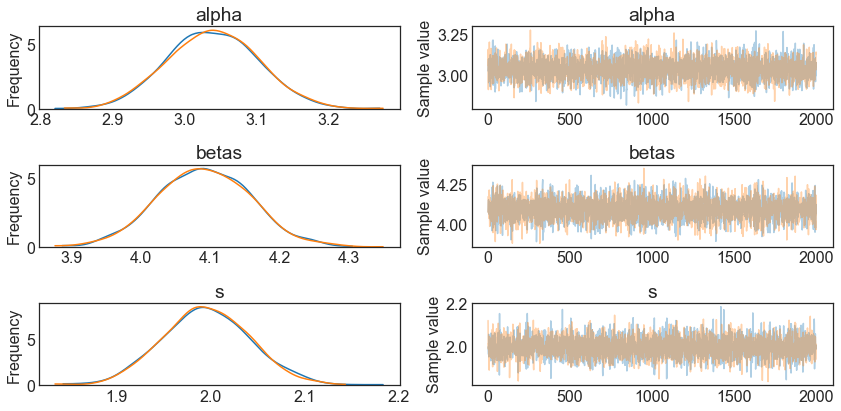

In [24]:
traceplot(LR2.trace)

Compare the two methods
===

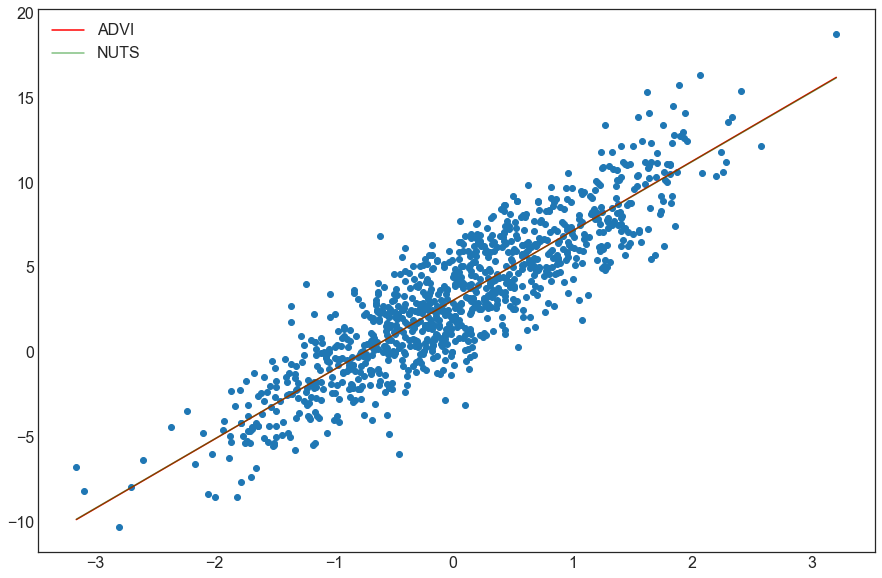

In [25]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']

m2 = LR2.summary['mean']['betas__0_0']
b2 = LR2.summary['mean']['alpha__0']
fig1 = plt.figure()
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.plot([min_x, max_x], [m2*min_x + b2, m2*max_x + b2], 'g', label='NUTS', alpha=0.5)
plt.legend()

Multiple predictors
===

In [26]:
num_pred = 2
X = np.random.randn(1000, num_pred)
noise = 2 * np.random.randn(1000,)
Y = X.dot(np.array([4, 5])) + 3 + noise

In [27]:
Y = np.squeeze(Y)

In [28]:
LR3 = LinearRegression()

In [29]:
LR3.fit(X, Y)

Average Loss = 2,148.3:  19%|█▊        | 37295/200000 [00:34<02:32, 1065.61it/s] 
Convergence archived at 37300
Interrupted at 37,299 [18%]: Average Loss = 6,770.3


LinearRegression()

In [30]:
LR3.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,2.881924,0.070929,0.000655,2.740616,3.019385
betas__0_0,4.004497,0.069264,0.000588,3.872080,4.139433
betas__0_1,5.035128,0.068802,0.000625,4.896398,5.164894
s,2.026088,0.048821,0.000539,1.932697,2.123530
